In [11]:

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0



In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Add convolutional layers
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer to prepare for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output




In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Corrected spelling
              metrics=['accuracy'])  # Corrected spelling

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))  # Train the model

model.summary()  # Display model summary

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy =", test_acc)  # Corrected variable name



Epoch 1/10


1875/1875 [==============================] - 19s 9ms/step - loss: 0.2229 - accuracy: 0.9300 - val_loss: 0.0862 - val_accuracy: 0.9718
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.0640 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0468 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0410 - val_accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0482 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0374 - val

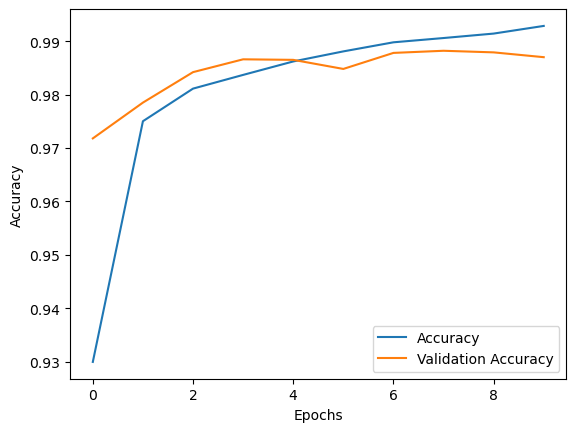

In [24]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [31]:
#evaluate
test_loss,test_acc=model.evaluate(X_test,y_test)
print("test Acc",test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0421 - accuracy: 0.9870
test Acc 0.9869999885559082


In [32]:
#pred
import numpy as np
pred=np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 4ms/step


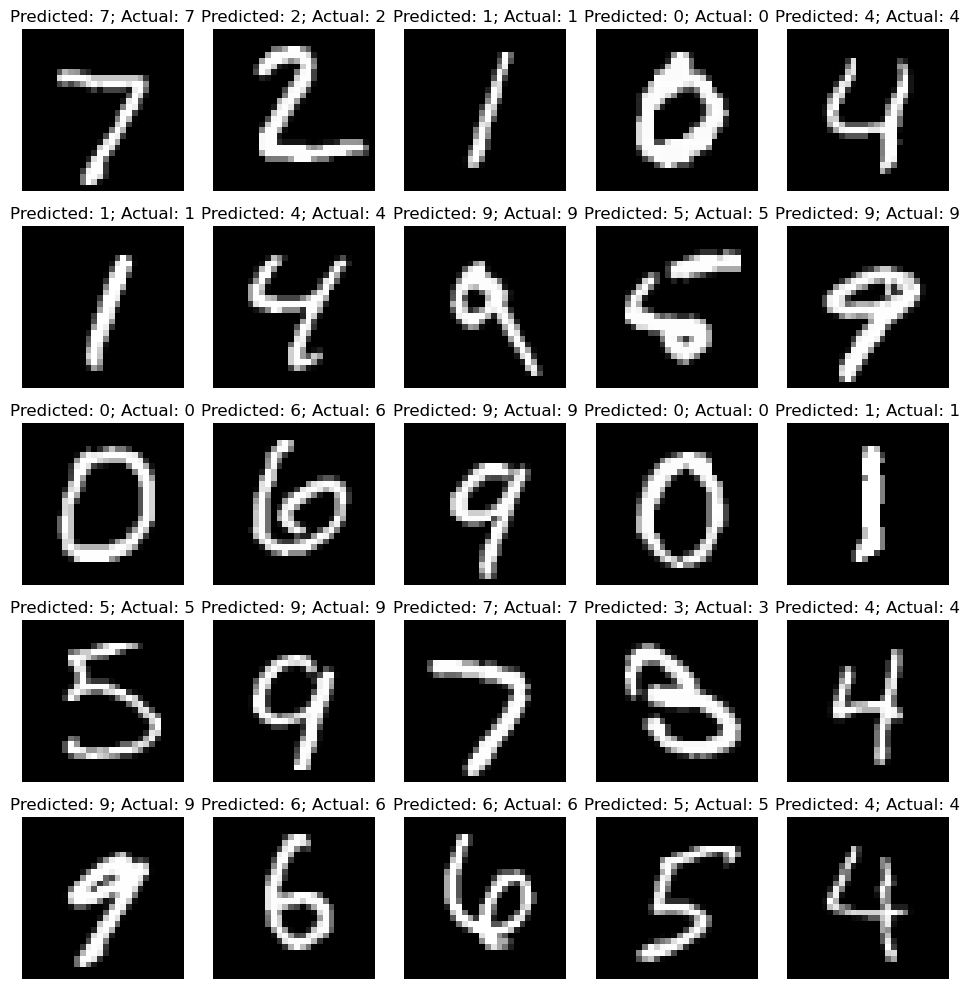

In [35]:
import matplotlib.pyplot as plt

# Create a 5x5 grid for displaying actual vs. predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Display the test image
    plt.title(f"Predicted: {pred[i]}; Actual: {y_test[i]}")  # Show predicted and actual labels
    plt.axis('off')  # Hide axes
    plt.tight_layout()

plt.show()
